Test code to compare quantification estimates with ground truths

In [80]:
import pandas as pd
import numpy as np
import glob
import os
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [2]:
concentrations_infile_A = '../../run/annotations/sequins_concentrations_A.tsv'
concentrations_infile_B = '../../run/annotations/sequins_concentrations_B.tsv'

#concentrations_infile_A = '../../run/M.R.15.csv'
#concentrations_infile_B = '../../run/M.R.16.csv'

conc_df_A = pd.read_table(concentrations_infile_A, index_col=0)
conc_df_B = pd.read_table(concentrations_infile_B, index_col=0)

conc_df = pd.merge(conc_df_A, conc_df_B, left_index=True, right_index=True)

print(conc_df.head())

          Length_x        MXA  Length_y         MXB
ID                                                 
R1_101_1       719  11.329650       719    0.472075
R1_101_2       430   3.776550       430    1.416225
R1_102_1      1490  13.217925      1490    7.553100
R1_102_2      1362   1.888275      1362   52.871700
R1_103_1      1754  60.424806      1754  453.186000


In [59]:
concentrations_infile = '/home/FILESERVER5/proteomics/tss38/Downloads/M.R.3.csv'
conc_df = pd.read_table(concentrations_infile, index_col=0)
print(conc_df.head())

          Length  MXA (attomol/ul)  MXB (attomol/ul)
ID                                                  
R1_11_1      703        161.132812          5.035400
R1_11_2      785         80.566406         10.070801
R1_13_1     1940       5156.250000       2578.125000
R1_13_2      698       2578.125000       5156.250000
R1_101_1     719         10.070801          1.258850


In [213]:
infiles = glob.glob('../../run/kallisto.dir/*/*/abundance.h5.tsv')

infiles2 = glob.glob('../../run/*/*/*/quant.sf')
infiles.extend(infiles2)

#infiles = glob.glob('../../run/*/*/*/genes.tsv.gz')
print(infiles)

['../../run/kallisto.dir/raw/GM12878-1/abundance.h5.tsv', '../../run/kallisto.dir/raw/GM12878-2/abundance.h5.tsv', '../../run/kallisto.dir/raw/GM12878-3/abundance.h5.tsv', '../../run/kallisto.dir/raw/K562-1/abundance.h5.tsv', '../../run/kallisto.dir/raw/K562-2/abundance.h5.tsv', '../../run/kallisto.dir/raw/K562-3/abundance.h5.tsv', '../../run/kallisto.dir/raw/neat-A/abundance.h5.tsv', '../../run/kallisto.dir/raw/neat-B/abundance.h5.tsv', '../../run/kallisto.dir/extracted/GM12878-1/abundance.h5.tsv', '../../run/kallisto.dir/extracted/GM12878-3/abundance.h5.tsv', '../../run/kallisto.dir/extracted/GM12878-2/abundance.h5.tsv', '../../run/kallisto.dir/extracted/K562-1/abundance.h5.tsv', '../../run/kallisto.dir/extracted/K562-2/abundance.h5.tsv', '../../run/kallisto.dir/extracted/K562-3/abundance.h5.tsv', '../../run/kallisto.dir/extracted/neat-A/abundance.h5.tsv', '../../run/kallisto.dir/extracted/neat-B/abundance.h5.tsv', '../../run/sailfish.dir/extracted/GM12878-1/quant.sf', '../../run/sai

In [214]:
final_df = pd.DataFrame()

sample2mix = {
    'K562-1':'A',
    'K562-2':'A',
    'K562-3':'A',
    'GM12878-1':'B',
    'GM12878-2':'B',
    'GM12878-3':'B',
    'neat-A':'A',
    'neat-B':'B'}

for infile in infiles:
    print(infile)
    path_split = infile.split('/')
    
    sample = path_split[-2]
    mix = sample2mix[sample]
    
    source = path_split[-3]
    
    quantifier = path_split[-4][:-4]
    
    tmp_df = pd.read_table(infile, index_col=0)
    if quantifier == 'kallisto':
        print(sum(tmp_df['est_counts']))
        print(sum(tmp_df['tpm']))
    else:
        print(sum(tmp_df['NumReads']))
        print(sum(tmp_df['TPM']))

    tmp_df = pd.merge(tmp_df, conc_df[['Length', 'MX%s (attomol/ul)' % mix]], left_index=True, right_index=True)
    #tmp_df = pd.merge(tmp_df, conc_df[['Mix%s' % mix]], left_index=True, right_index=True)
    if quantifier == 'kallisto':
        tmp_df.columns = ['length', 'eff_length', 'est_counts', 'tpm', 'Length', 'Truth']
    else:
        tmp_df.columns = ['length', 'eff_length', 'tpm', 'est_counts', 'Length', 'Truth']

    tmp_df['Quantifier'] = quantifier
    tmp_df['Mix'] = mix
    tmp_df['Type'] = sample.split('-')[0]
    if sample.split("-")[0] == 'neat':
        tmp_df['group'] = sample
    else:
        tmp_df['group'] = sample.split("-")[0]
    tmp_df['Source'] = source
    tmp_df['Sample'] = sample
    final_df = pd.concat([final_df, tmp_df])
    print(sum(tmp_df['est_counts']))
    print(sum(tmp_df['tpm']))
    
final_df['transcript'] = final_df.index

../../run/kallisto.dir/raw/GM12878-1/abundance.h5.tsv
1462936.57022
999999.969437
1462936.57022
999999.969437
../../run/kallisto.dir/raw/GM12878-2/abundance.h5.tsv
1350295.81064
1000000.56186
1350295.81064
1000000.56186
../../run/kallisto.dir/raw/GM12878-3/abundance.h5.tsv
1252407.05322
999999.599757
1252407.05322
999999.599757
../../run/kallisto.dir/raw/K562-1/abundance.h5.tsv
1712488.81465
1000000.77062
1712488.81465
1000000.77062
../../run/kallisto.dir/raw/K562-2/abundance.h5.tsv
1181912.32916
999999.992608
1181912.32916
999999.992608
../../run/kallisto.dir/raw/K562-3/abundance.h5.tsv
1458544.04581
1000000.87722
1458544.04581
1000000.87722
../../run/kallisto.dir/raw/neat-A/abundance.h5.tsv
21201984.5803
1000000.13263
21201984.5803
1000000.13263
../../run/kallisto.dir/raw/neat-B/abundance.h5.tsv
20246230.455
999999.425034
20246230.455
999999.425034
../../run/kallisto.dir/extracted/GM12878-1/abundance.h5.tsv
1364837.8704
999999.186953
1364837.8704
999999.186953
../../run/kallisto.dir/

In [215]:
final_df['absolute_difference'] = (
    np.log10(final_df['est_counts']+0.001) -
        np.log10(final_df['Truth']+0.001))
                                            

In [216]:
tmp_df = final_df[final_df['Truth']>100]
tmp_df = tmp_df[tmp_df['Quantifier']=='salmon']
#print(tmp_df.sort_values('absolute_difference').head())
#print(tmp_df[tmp_df['absolute_difference']<(-3)])
high_difference = list(set(tmp_df[tmp_df['absolute_difference']<(-3)].index))
print(high_difference)
tmp_df = tmp_df[tmp_df['Type']=='neat']
print(tmp_df[tmp_df.index.isin(high_difference)].sort_values(['transcript', 'Sample']))

['R2_26_2', 'R2_14_2', 'R1_11_1', 'R1_21_2']
         Length Mix Quantifier  Sample     Source         Truth  Type  \
R1_11_1     703   A     salmon  neat-A  extracted    161.132812  neat   
R1_11_1     703   A     salmon  neat-A        raw    161.132812  neat   
R1_21_2     794   A     salmon  neat-A  extracted  27500.000000  neat   
R1_21_2     794   A     salmon  neat-A        raw  27500.000000  neat   
R1_21_2     794   B     salmon  neat-B  extracted  27500.000000  neat   
R1_21_2     794   B     salmon  neat-B        raw  27500.000000  neat   
R2_14_2     596   A     salmon  neat-A  extracted   4419.642857  neat   
R2_14_2     596   A     salmon  neat-A        raw   4419.642857  neat   
R2_14_2     596   B     salmon  neat-B  extracted  17678.571430  neat   
R2_14_2     596   B     salmon  neat-B        raw  17678.571430  neat   
R2_26_2    1417   B     salmon  neat-B  extracted  30000.000000  neat   
R2_26_2    1417   B     salmon  neat-B        raw  30000.000000  neat   

     

In [217]:
print(final_df.head())
print(final_df.shape)
print(final_df.ix['R1_102_2'])
#print(final_df.ix['R1_101'])

          Length Mix Quantifier     Sample Source        Truth     Type  \
R1_11_1      703   B   kallisto  GM12878-1    raw     5.035400  GM12878   
R1_11_2      785   B   kallisto  GM12878-1    raw    10.070801  GM12878   
R1_13_1     1940   B   kallisto  GM12878-1    raw  2578.125000  GM12878   
R1_13_2      698   B   kallisto  GM12878-1    raw  5156.250000  GM12878   
R1_101_1     719   B   kallisto  GM12878-1    raw     1.258850  GM12878   

          eff_length   est_counts    group  length          tpm transcript  \
R1_11_1      517.498      2.79854  GM12878     703      2.53829    R1_11_1   
R1_11_2      599.443     29.20150  GM12878     785     22.86520    R1_11_2   
R1_13_1     1754.380  19798.40000  GM12878    1940   5296.92000    R1_13_1   
R1_13_2      512.498  93293.60000  GM12878     698  85443.20000    R1_13_2   
R1_101_1     533.498      4.00000  GM12878     719      3.51921   R1_101_1   

          absolute_difference  
R1_11_1             -0.255034  
R1_11_2         

In [218]:
%%R -i final_df
library(ggplot2)

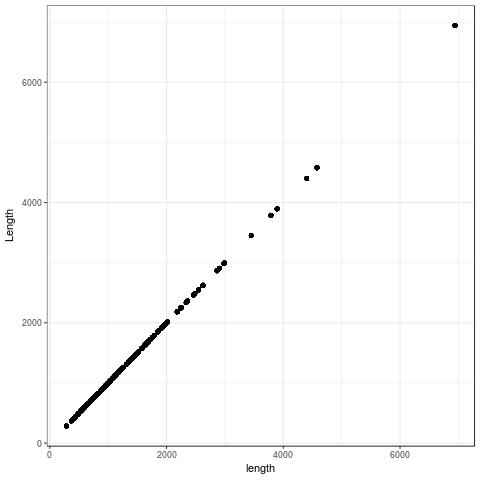

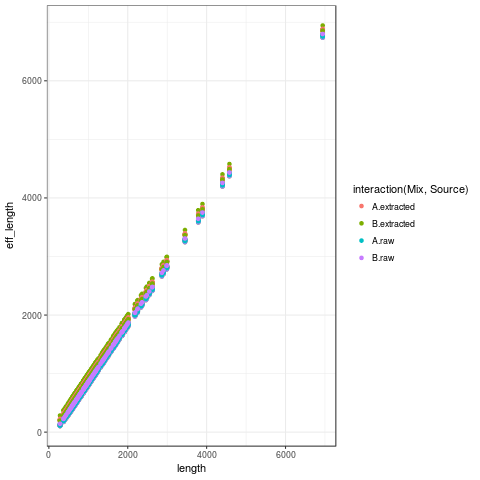

In [219]:
%%R
p = ggplot(final_df, aes(length, Length)) + geom_point() + theme_bw()
print(p)

p = ggplot(final_df, aes(length, eff_length, colour=interaction(Mix,Source))) + geom_point() + theme_bw()
print(p)

   Length Mix Quantifier    Sample Source        Truth    Type eff_length
1     703   B   kallisto GM12878-1    raw 5.035400e+00 GM12878    517.498
2     785   B   kallisto GM12878-1    raw 1.007080e+01 GM12878    599.443
3    1940   B   kallisto GM12878-1    raw 2.578125e+03 GM12878   1754.380
4     698   B   kallisto GM12878-1    raw 5.156250e+03 GM12878    512.498
5     719   B   kallisto GM12878-1    raw 1.258850e+00 GM12878    533.498
6     430   B   kallisto GM12878-1    raw 6.294250e-01 GM12878    246.860
7    2361   B   kallisto GM12878-1    raw 3.933907e-02 GM12878   2175.380
8    1022   B   kallisto GM12878-1    raw 1.966953e-02 GM12878    836.380
9     975   B   kallisto GM12878-1    raw 3.222656e+02 GM12878    789.380
10    604   B   kallisto GM12878-1    raw 6.445312e+02 GM12878    418.637
11   1118   B   kallisto GM12878-1    raw 1.007080e+01 GM12878    932.380
12   1504   B   kallisto GM12878-1    raw 5.035400e+00 GM12878   1318.380
13    955   B   kallisto GM12878-1    

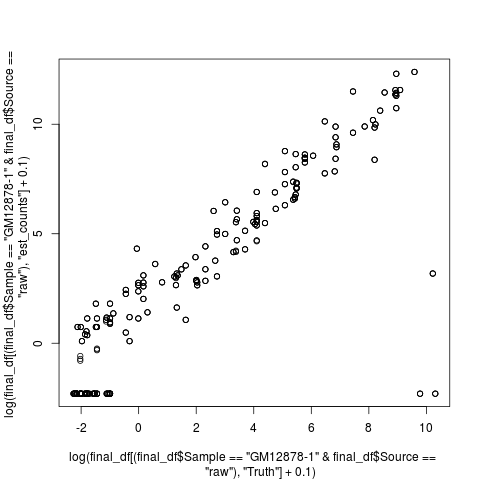

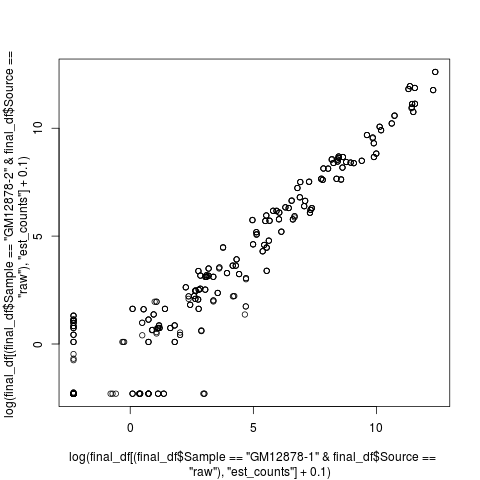

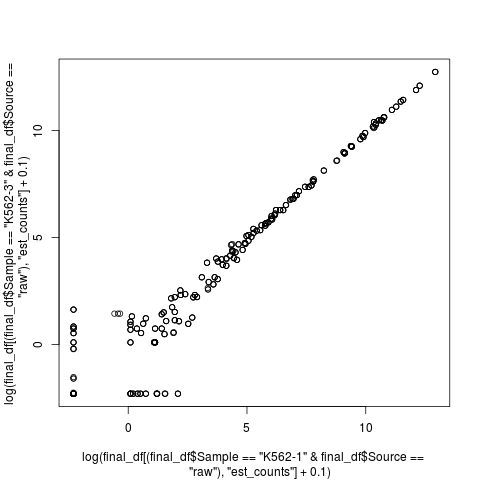

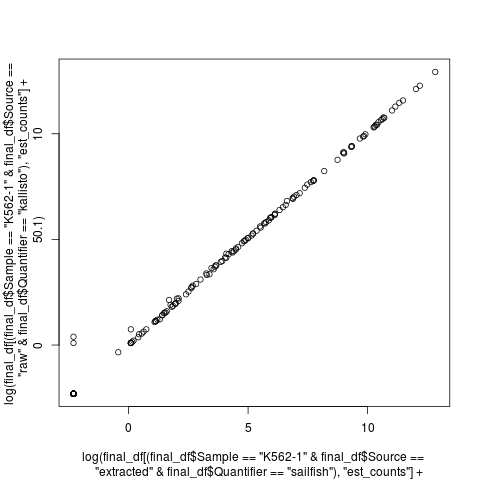

In [220]:
%%R -i final_df

print(head(final_df[final_df['Source']=='raw',], 20))
plot(log(final_df[(final_df$Sample=='GM12878-1' & final_df$Source=='raw'), 'Truth']+0.1),
     log(final_df[(final_df$Sample=='GM12878-1' & final_df$Source=='raw'), 'est_counts']+0.1))

plot(log(final_df[(final_df$Sample=='GM12878-1' & final_df$Source=='raw'), 'est_counts']+0.1),
     log(final_df[(final_df$Sample=='GM12878-2' & final_df$Source=='raw'), 'est_counts']+0.1))

plot(log(final_df[(final_df$Sample=='K562-1' & final_df$Source=='raw'), 'est_counts']+0.1),
     log(final_df[(final_df$Sample=='K562-3' & final_df$Source=='raw'), 'est_counts']+0.1))

plot(log(final_df[(final_df$Sample=='K562-1' & final_df$Source=='extracted' & final_df$Quantifier=='sailfish'),
                  'est_counts']+0.1),
     log(final_df[(final_df$Sample=='K562-1' & final_df$Source=='raw'& final_df$Quantifier=='kallisto'),
                  'est_counts']+0.1))

#plot(log(final_df[(final_df$Sample=='K562-1' & final_df$Source=='extracted' & final_df$Quantifier=='salmon'),
#                  'est_counts']+0.1),
#     log(final_df[(final_df$Sample=='K562-1' & final_df$Source=='raw'& final_df$Quantifier=='kallisto'),
#                  'est_counts']+0.1))

In [221]:
%%R -i final_df -w 1000 -h 1000 -i high_difference

final_df['high_difference'] = final_df[['transcript']] %in% high_difference
final_df['label'] = final_df['transcript']
final_df['label'][final_df['high_difference']==FALSE] <- NaN

print(head(final_df))
print(table(c(final_df['group'], final_df['Quantifier'])))

  Length Mix Quantifier    Sample Source       Truth    Type eff_length
1    703   B   kallisto GM12878-1    raw    5.035400 GM12878    517.498
2    785   B   kallisto GM12878-1    raw   10.070801 GM12878    599.443
3   1940   B   kallisto GM12878-1    raw 2578.125000 GM12878   1754.380
4    698   B   kallisto GM12878-1    raw 5156.250000 GM12878    512.498
5    719   B   kallisto GM12878-1    raw    1.258850 GM12878    533.498
6    430   B   kallisto GM12878-1    raw    0.629425 GM12878    246.860
   est_counts   group length         tpm transcript absolute_difference
1     2.79854 GM12878    703     2.53829    R1_11_1          -0.2550336
2    29.20150 GM12878    785    22.86520    R1_11_2           0.4623129
3 19798.40000 GM12878   1940  5296.92000    R1_13_1           0.8853260
4 93293.60000 GM12878    698 85443.20000    R1_13_2           1.2575178
5     4.00000 GM12878    719     3.51921   R1_101_1           0.5018497
6     1.00000 GM12878    430     1.90137   R1_101_2           0.

In [222]:
%%R -i final_df
final_df = final_df[final_df['Type']=='neat',]
final_df = final_df[final_df['Quantifier']=='kallisto',]

print(final_df[final_df['transcript']=='R1_11_1',])


     Length Mix Quantifier Sample    Source    Truth Type eff_length est_counts
985     703   A   kallisto neat-A       raw 161.1328 neat    558.117   5765.810
1149    703   B   kallisto neat-B       raw   5.0354 neat    562.035    199.198
2297    703   A   kallisto neat-A extracted 161.1328 neat    637.578   5616.430
2461    703   B   kallisto neat-B extracted   5.0354 neat    628.469    161.923
      group length      tpm transcript absolute_difference
985  neat-A    703 369.6090    R1_11_1            1.553674
1149 neat-B    703  15.1885    R1_11_1            1.597167
2297 neat-A    703 356.8630    R1_11_1            1.542274
2461 neat-B    703  12.2579    R1_11_1            1.507191


In [223]:
%%R
runif(1, 0, 0.5)

[1] 0.429044


/home/FILESERVER5/proteomics/tss38/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Saving 13.9 x 13.9 in image

  warnings.warn(x, RRuntimeWarning)
/home/FILESERVER5/proteomics/tss38/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: No summary function supplied, defaulting to `mean_se()

  warnings.warn(x, RRuntimeWarning)


  Length Mix Quantifier    Sample Source       Truth    Type eff_length
1    703   B   kallisto GM12878-1    raw    5.035400 GM12878    517.498
2    785   B   kallisto GM12878-1    raw   10.070801 GM12878    599.443
3   1940   B   kallisto GM12878-1    raw 2578.125000 GM12878   1754.380
4    698   B   kallisto GM12878-1    raw 5156.250000 GM12878    512.498
5    719   B   kallisto GM12878-1    raw    1.258850 GM12878    533.498
6    430   B   kallisto GM12878-1    raw    0.629425 GM12878    246.860
   est_counts   group length         tpm transcript absolute_difference
1     2.79854 GM12878    703     2.53829    R1_11_1          -0.2550336
2    29.20150 GM12878    785    22.86520    R1_11_2           0.4623129
3 19798.40000 GM12878   1940  5296.92000    R1_13_1           0.8853260
4 93293.60000 GM12878    698 85443.20000    R1_13_2           1.2575178
5     4.00000 GM12878    719     3.51921   R1_101_1           0.5018497
6     1.00000 GM12878    430     1.90137   R1_101_2           0.

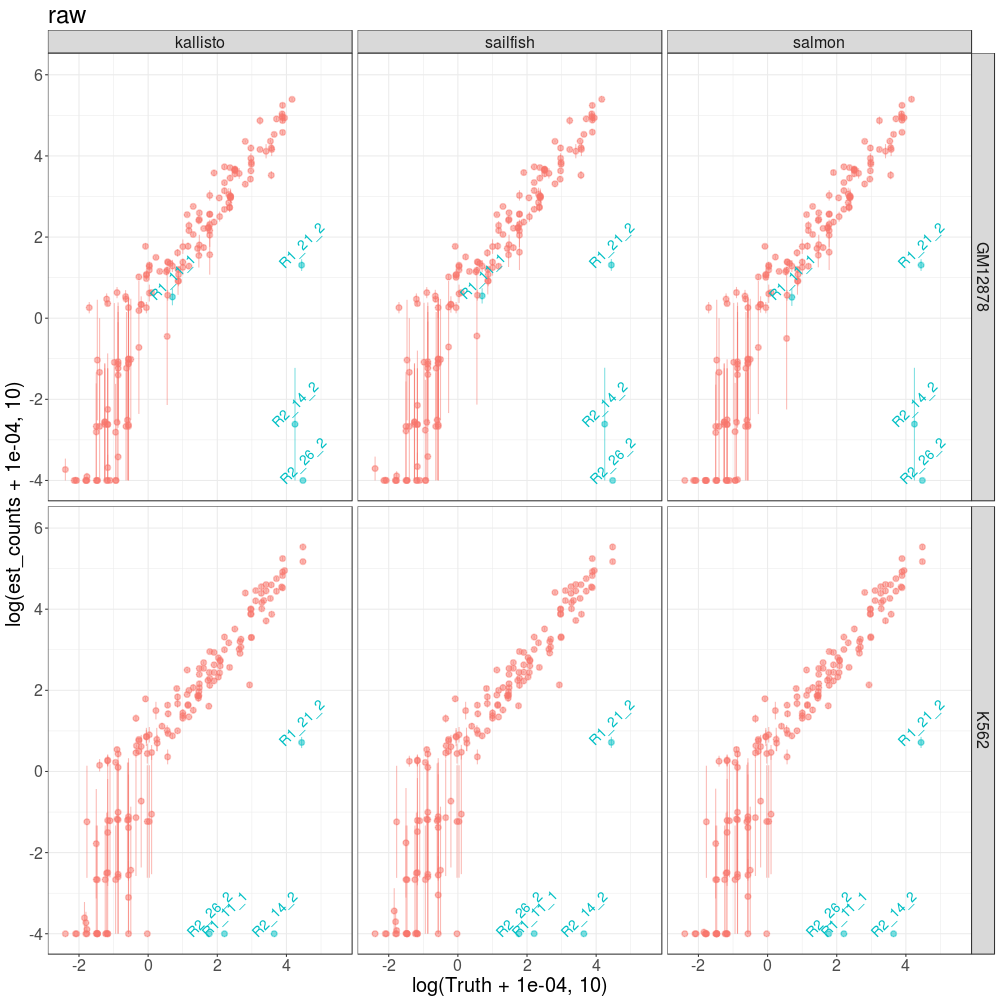

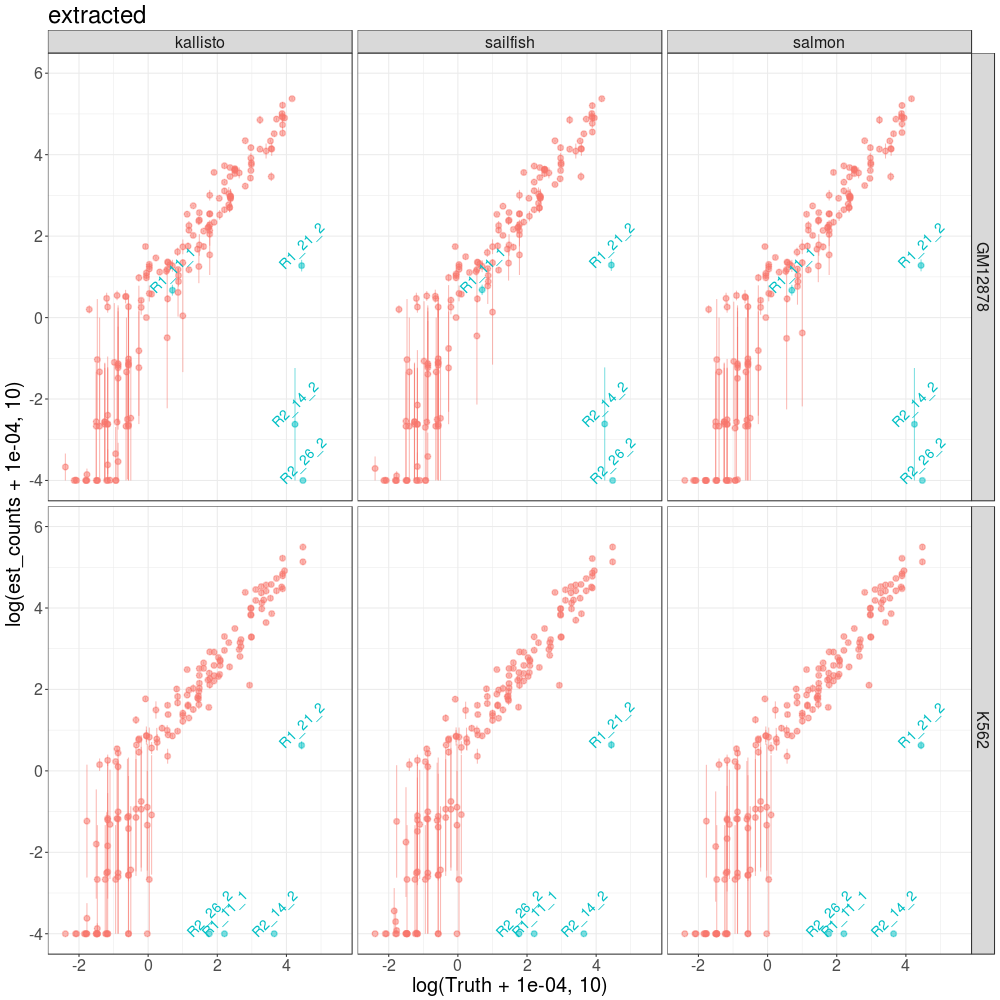

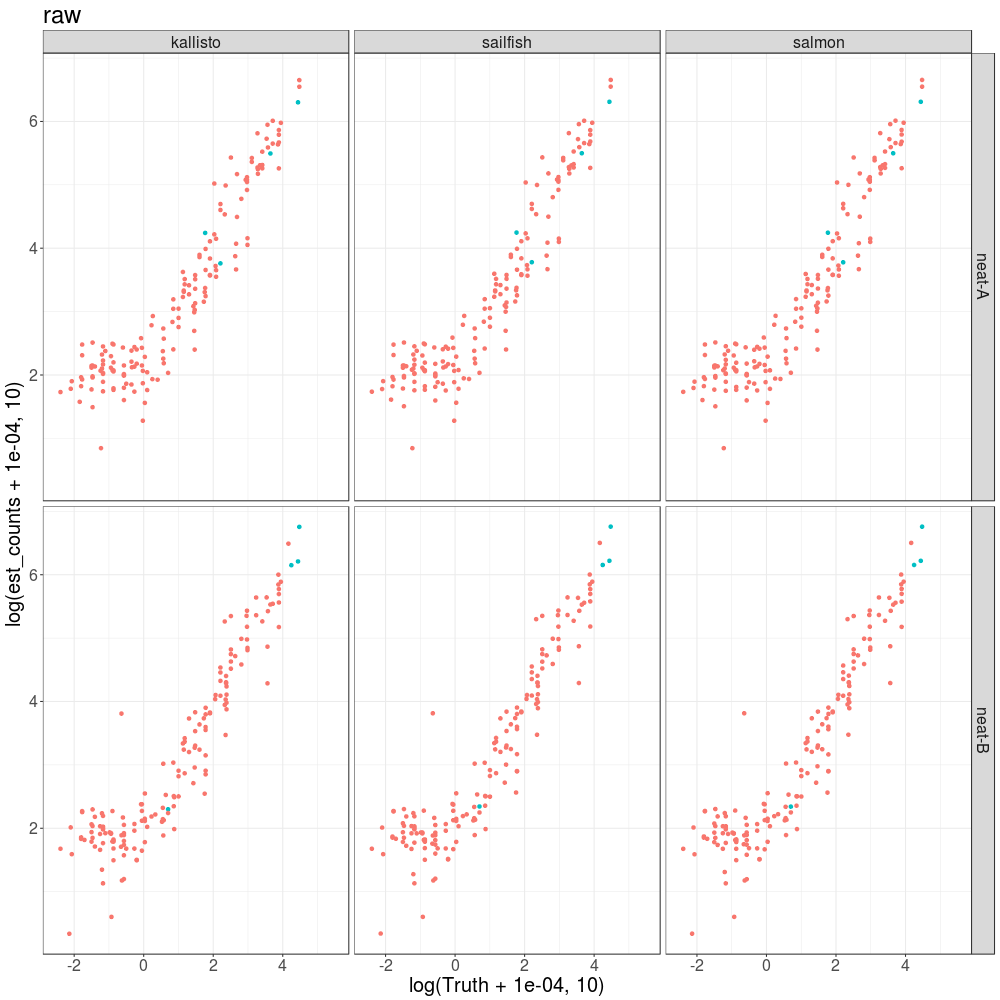

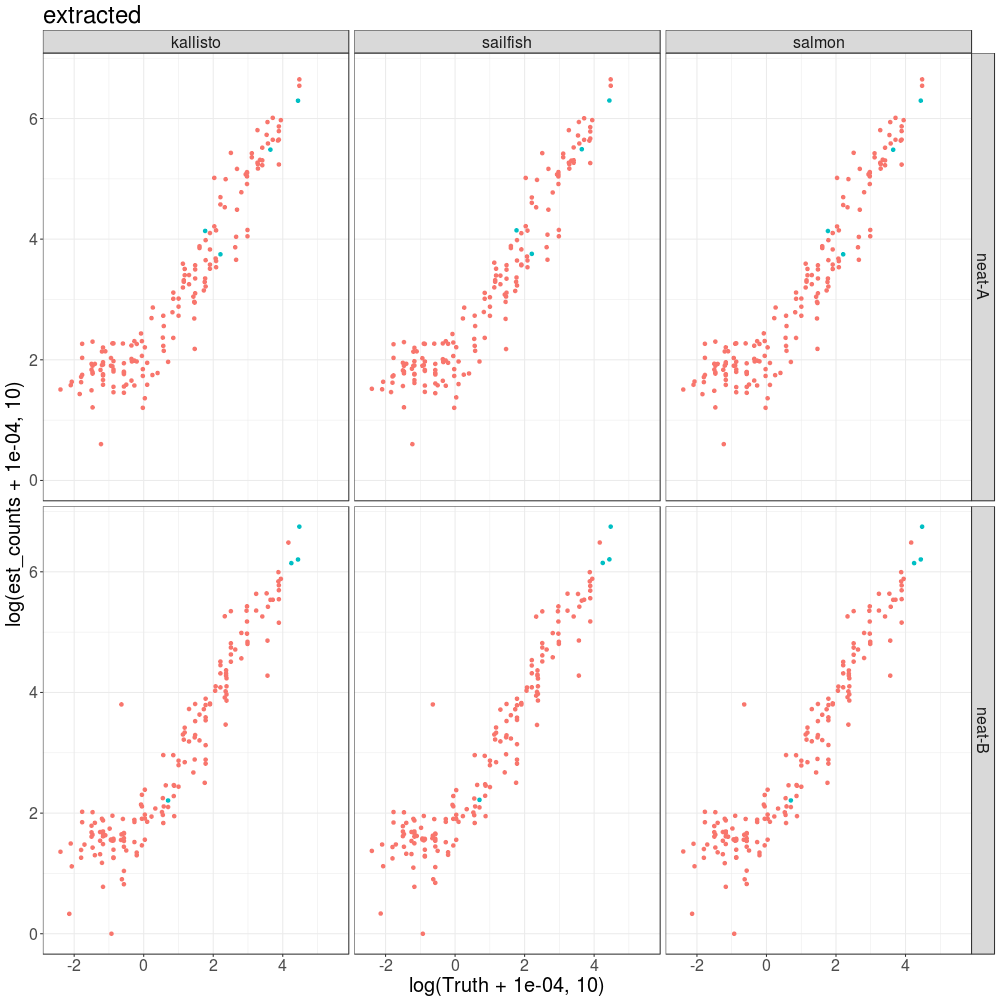

In [224]:
%%R -i final_df -w 1000 -h 1000 -i high_difference

final_df['high_difference'] = final_df[['transcript']] %in% high_difference
final_df['label'] = final_df['transcript']
final_df['label'][final_df['high_difference']==FALSE] <- NaN
outdir = './plots/'

print(head(final_df))
tmp_df = final_df[final_df$Type!='neat',]

m_txt = element_text(size=20)
my_theme = theme(
text=m_txt,
legend.position='none')

for (s in unique(tmp_df$Source)){
    p = ggplot(tmp_df[tmp_df$Source == s,],
               aes(log(Truth+0.0001,10), log(est_counts+0.0001,10), colour=high_difference, group=transcript)) +
    stat_summary(alpha=0.5) +
    stat_summary(aes(label=label), fun.y=function(x) mean(x)+0.5, geom="text", size=5, angle=45) +
    facet_grid(group~Quantifier) +
    theme_bw() +
    scale_colour_discrete(guide=FALSE) +
    xlim(-2.5,5.5) +
    ggtitle(s) + my_theme
    
    ggsave(paste0(outdir, s, "_samples_correlations.png"))
    
    print(p)
}

tmp_df2 = final_df[final_df$Type=='neat',]
                 
for (s in unique(tmp_df2$Source)){
    p = ggplot(tmp_df2[tmp_df2$Source == s,],
               aes(log(Truth+0.0001,10), log(est_counts+0.0001,10), colour=high_difference, group=transcript)) +
    geom_point() +
    facet_grid(group~Quantifier) +
    theme_bw() +
    xlim(-2.5,5.5) +
    ggtitle(s) + my_theme
    
    ggsave(paste0(outdir, s, "_neat_correlations.png"))
    
    print(p)
}